In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [2]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


## 5' end binding

In [3]:
def term1(tau,N,M,c,k,denom):
    S = 0;
    for n in range(0,N+1):
        S += (N-n)*(N-n+1)*(2*N+n+1)/6*(k*tau)**n/math.factorial(n)/denom; 
    return S*c/k*np.exp(-k*tau)

def term2(tau,N,M,c,k,denom):
    S = 0;
    for n in range(0,N):
        S += N*n*(2*N-n+1)/2*(k*tau)**n/math.factorial(n)/denom; 
    return S*c/k*np.exp(-k*tau)

def term3(tau,N,M,c,k,denom):
    S = np.float64(0)
    for n in range(N,M):
        if (tau==0):
            S += 0;
        else:
            tmp1 = n*np.log(k*tau)
            tmp2 = 0.5*np.log(2*np.pi*n)+n*np.log(n)-n;
            S += N**2*(N+1)/2*np.exp(tmp1-tmp2)/denom;
    return S*c/k*np.exp(-k*tau)

def term4(tau,N,M,c,k,denom):
    S = 0;
    for n in range(1,N+1):
        if (tau==0):
            S += 0;
        else:
            tmp1 = (M+N-n)*np.log(k*tau)
            tmp2 = 0.5*np.log(2*np.pi*(M+N-n))+(M+N-n)*np.log(M+N-n)-(M+N-n);
            S += N*n*(n+1)/2*np.exp(tmp1-tmp2)/denom; 
    return S*c/k*np.exp(-k*tau)

def term5(tau,N,M,c,k,denom):
    S = 0;
    for n in range(0,M+1):
        if n < N:
            S += (M-n)*(k*tau)**n/math.factorial(n); 
        else:
            if tau > 0:
                tmp1 = n*np.log(k*tau);
                tmp2 = 0.5*np.log(2*np.pi*n)+n*np.log(n)-n;
                S += (M-n)*np.exp(tmp1-tmp2)
    return N*N*S*c/k*np.exp(-k*tau)/denom

def denominator(N,M,c,k):
    return (c/k)**2*(N*(N+1)/2+N*M)**2

In [4]:
import decimal
decimal.getcontext().prec = 100

term1 = np.vectorize(term1)
term2 = np.vectorize(term2)
term3 = np.vectorize(term3)
term4 = np.vectorize(term4)
term5 = np.vectorize(term5)

### conditions for linear approximation

In [25]:
def Heaviside(tau,c,M,k):
    T = M/k;
    if tau > T:
        return 0
    else:
        return (T-tau)/(c*T**2)
Heaviside = np.vectorize(Heaviside)

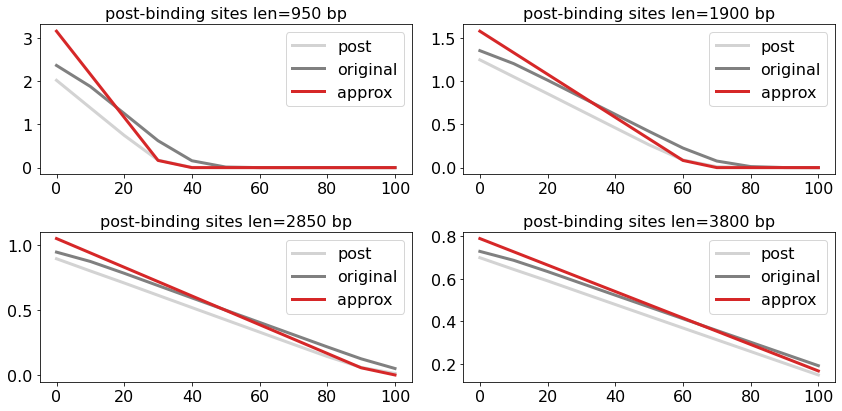

In [50]:
M_list = np.array([50,100,150,200])
tau = np.linspace(0,100,11);
k = (30/19.0);
N = 24;
c = 0.01;
plt.rcParams["figure.figsize"] = (12,6)
for i in range(0,4):
    subplot(2,2,i+1);
    M = M_list[i]
    plt.title('post-binding sites len='+str(M*19)+' bp')
    denom = denominator(N,M,c,k);
    G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+term5(tau,N,M,c,k,denom)
    plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',color='lightgray',**plotStyles);
    plt.plot(tau, G, label='original',color='gray',**plotStyles);
    plt.plot(tau, Heaviside(tau,c,M,k), label='approx',color='tab:red',**plotStyles);
    plt.legend()
tight_layout()

### reproducing Figure D4 in Supplmentary Materials  (page 22)

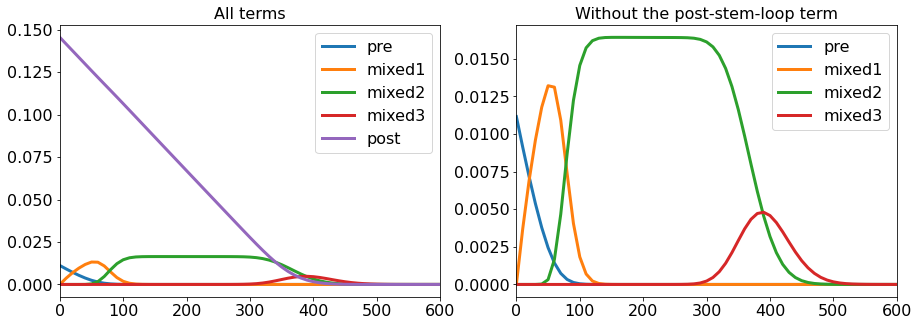

In [5]:
plt.rcParams["figure.figsize"] = (15,5)
c = 0.015;
k = 0.3;
M = 111;
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,600,61);
plt.subplot(1,2,1)
plt.title('All terms')
plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,600)
legend()

plt.subplot(1,2,2)
plt.title('Without the post-stem-loop term')
plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
#plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,600)
legend()

## test for 24 MS2 binding sites upstream of LacZ gene

### decomposition of terms

### contribution of cross terms

In [7]:
def term_other(tau,N,M,c,k,denom):
    S = np.float64(0);
    for m in range(1,N+1):
        for n in range(N+1, N+M+1):
            if tau > 0:
                if n-m > N:
                    tmp1 = tmp1 = (n-m)*np.log(k*tau)
                    tmp2 = 0.5*np.log(2*np.pi*(n-m))+(n-m)*np.log(n-m)-(n-m);
                    S += N*m*np.exp(tmp1-tmp2)
                else:
                    S += N*m*(k*tau)**(n-m)/np.math.factorial(n-m); 
    return S*c/k*np.exp(-k*tau)/denom

term_other = np.vectorize(term_other)

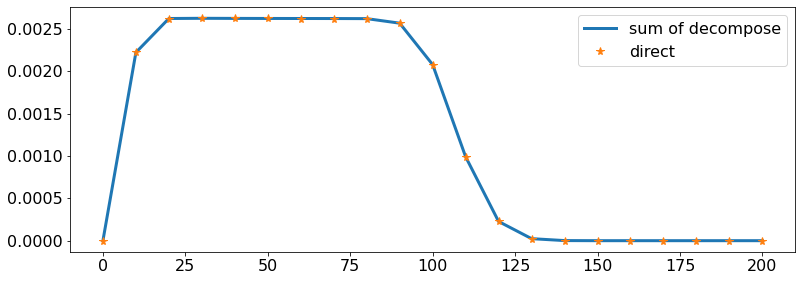

In [8]:
k = 30.0/19.0;
M = int(3075/19);
N = 24;
c = 0.01;
G_other1 = term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)
#N = 48;
#G_other2 = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+term5(tau,N,M,c,k,denom)
plt.plot(tau, G_other1, label='sum of decompose',**plotStyles);
plt.plot(tau, term_other(tau,N,M,c,k,denom), '*',label='direct',**plotStyles);
#plt.plot(tau, G_other2, label='48 MS2',**plotStyles);
#plt.plot(tau, G, label='all',**plotStyles);
legend()

In [9]:
def my_func(tau,k,c,T):
    if tau > T:
        return k*T+1/(c*T)
    else:
        return k*tau+1/(c*T)
my_funcv = np.vectorize(my_func)

### decomposition

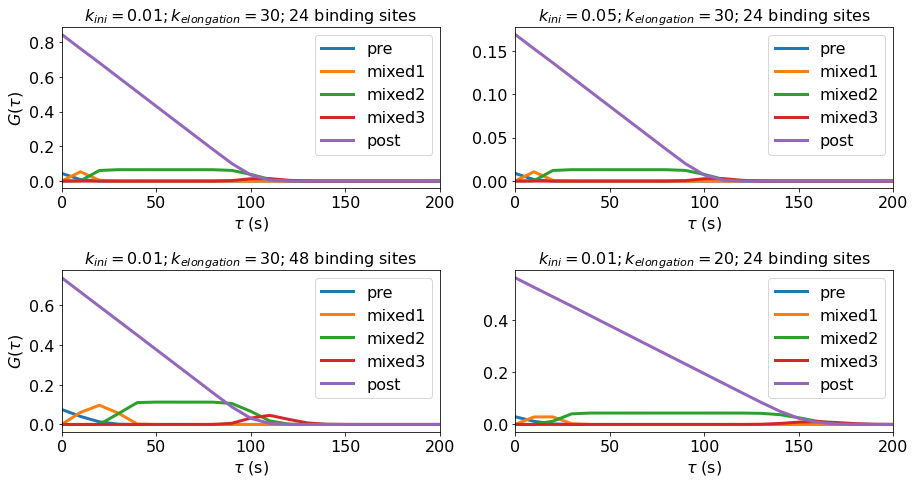

In [47]:
plt.rcParams["figure.figsize"] = (13,7)
plt.subplot(2,2,1)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 30;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);

plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,200)
legend()

plt.subplot(2,2,2)
plt.title(r'$k_{ini} = 0.05; k_{elongation} = 30;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
c = 0.05;
k = 30.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,200)
legend()

plt.subplot(2,2,3)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 30;$48 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 48;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);

plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,200)
legend()

plt.subplot(2,2,4)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 20;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
c = 0.01;
k = 20.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,200)
legend()


tight_layout()

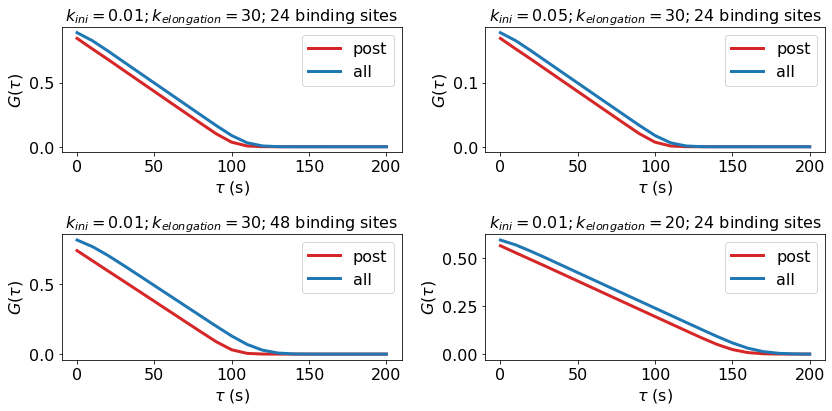

In [51]:
plt.rcParams["figure.figsize"] = (12,6)

plt.subplot(2,2,1)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 30;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
legend()

plt.subplot(2,2,2)
plt.title(r'$k_{ini} = 0.05; k_{elongation} = 30;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.05;
k = 30.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5;
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
legend()

plt.subplot(2,2,3)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 30;$48 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 48;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);

legend()

plt.subplot(2,2,4)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 20;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 20.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5;
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
legend()

tight_layout()

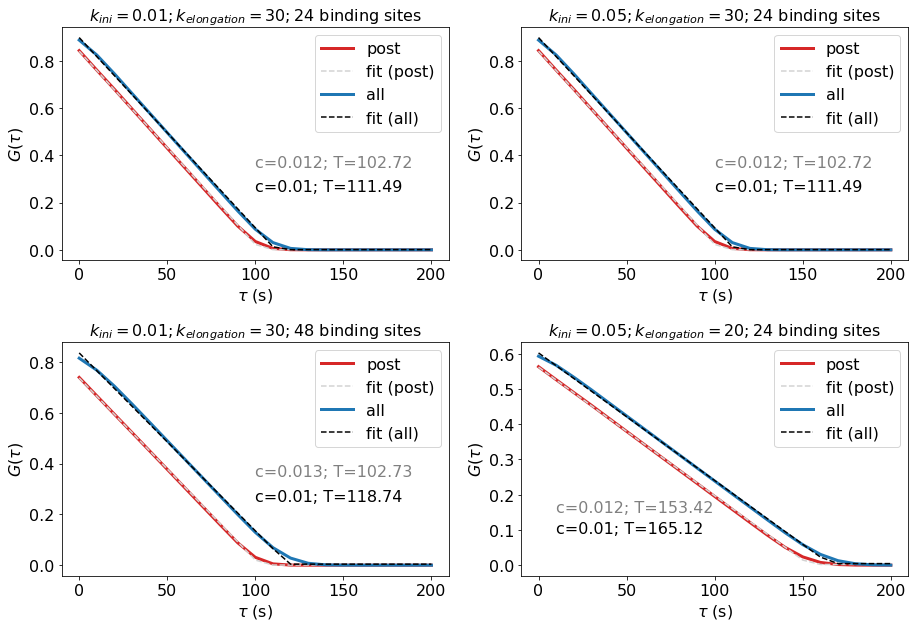

In [21]:
plt.rcParams["figure.figsize"] = (13,9)

plt.subplot(2,2,1)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 30;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
popt, pcov = curve_fit(my_funcv, tau, t5, p0=[-0.04,0.05,50])
plt.plot(tau, my_funcv(tau,*popt),'--',color='lightgray', label='fit (post)')
plt.text(100,0.35,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='gray')
popt, pcov = curve_fit(my_funcv, tau, G, p0=[-0.04,0.01,100])
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
plt.plot(tau, my_funcv(tau,*popt),'--',color='black', label='fit (all)')
plt.text(100,0.25,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='black')
legend()

plt.subplot(2,2,2)
plt.title(r'$k_{ini} = 0.05; k_{elongation} = 30;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5;
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
popt, pcov = curve_fit(my_funcv, tau, t5, p0=[-0.04,0.05,50])
plt.plot(tau, my_funcv(tau,*popt),'--',color='lightgray', label='fit (post)')
plt.text(100,0.35,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='gray')
popt, pcov = curve_fit(my_funcv, tau, G, p0=[-0.04,0.01,100])
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
plt.plot(tau, my_funcv(tau,*popt),'--',color='black', label='fit (all)')
plt.text(100,0.25,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='black')
legend()

plt.subplot(2,2,3)
plt.title(r'$k_{ini} = 0.01; k_{elongation} = 30;$48 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(3075/19);
N = 48;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
popt, pcov = curve_fit(my_funcv, tau, t5, p0=[-0.04,0.05,50])
plt.plot(tau, my_funcv(tau,*popt),'--',color='lightgray', label='fit (post)')
plt.text(100,0.35,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='gray')
popt, pcov = curve_fit(my_funcv, tau, G, p0=[-0.04,0.01,100])
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
plt.plot(tau, my_funcv(tau,*popt),'--',color='black', label='fit (all)')
plt.text(100,0.25,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='black')
legend()

plt.subplot(2,2,4)
plt.title(r'$k_{ini} = 0.05; k_{elongation} = 20;$24 binding sites')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 20.0/19.0;
M = int(3075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);
t5 = term5(tau,N,M,c,k,denom);
G = term1(tau,N,M,c,k,denom)+term2(tau,N,M,c,k,denom)+term3(tau,N,M,c,k,denom)+term4(tau,N,M,c,k,denom)+t5;
plt.plot(tau, t5, label='post',color='tab:red', **plotStyles);
popt, pcov = curve_fit(my_funcv, tau, t5, p0=[-0.04,0.05,50])
plt.plot(tau, my_funcv(tau,*popt),'--',color='lightgray', label='fit (post)')
plt.text(10,0.15,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='gray')
popt, pcov = curve_fit(my_funcv, tau, G, p0=[-0.04,0.01,100])
plt.plot(tau, G, label='all',color='tab:blue',**plotStyles);
plt.plot(tau, my_funcv(tau,*popt),'--',color='black', label='fit (all)')
plt.text(10,0.09,'c='+str(round(popt[1],3))+'; T='+str(round(popt[2],2)),color='black')
legend()

tight_layout()

## shorter gene

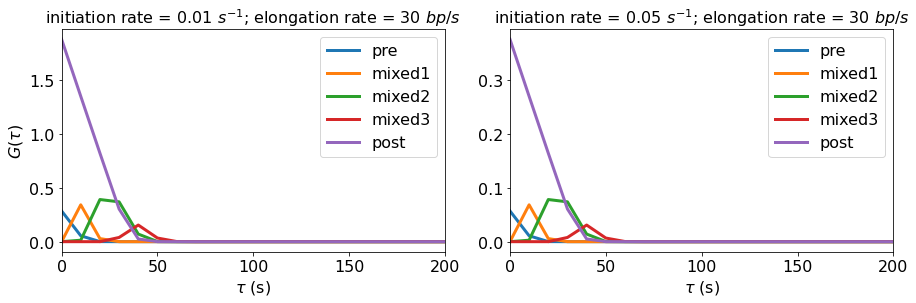

In [15]:
plt.rcParams["figure.figsize"] = (13,4.5)
plt.subplot(1,2,1)
plt.title(r'initiation rate = 0.01 $s^{-1}$; elongation rate = 30 $bp/s$')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$G(\tau)$')
c = 0.01;
k = 30.0/19.0;
M = int(1075/19);
N = 24;
denom = denominator(N,M,c,k);
tau = np.linspace(0,200,21);

plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,200)
legend()

plt.subplot(1,2,2)
plt.title(r'initiation rate = 0.05 $s^{-1}$; elongation rate = 30 $bp/s$')
plt.xlabel(r'$\tau$ (s)')
c = 0.05;
k = 30.0/19.0;
M = int(1075/19);
N = 24;
denom = denominator(N,M,c,k);
plt.plot(tau, term1(tau,N,M,c,k,denom), label='pre',**plotStyles);
plt.plot(tau, term2(tau,N,M,c,k,denom), label='mixed1',**plotStyles);
plt.plot(tau, term3(tau,N,M,c,k,denom), label='mixed2',**plotStyles);
plt.plot(tau, term4(tau,N,M,c,k,denom), label='mixed3',**plotStyles);
plt.plot(tau, term5(tau,N,M,c,k,denom), label='post',**plotStyles);
plt.xlim(0,200)
legend()

tight_layout()

### simulated data

In [56]:
def cal_autocorr(counts, tau, len_replicate, duration):
    numerator = np.array([]);
    F_i = np.mean(counts[:,0:duration-tau], axis=0);
    for i in range(0, len_replicate):
        n_tmp = counts[i,0:duration-tau]*counts[i,tau:];
        numerator = np.append(numerator, n_tmp);
    return np.mean(numerator)/np.mean(F_i*F_i)-1

In [57]:
def get_counts(filename, duration, n_probe, verbose):
    fp = h5py.File(filename, "r");
    replicates=fp["/Simulations"].keys();
    n = 1; times=fp["/Simulations/%07d/SpeciesCountTimes"%n];
    
    counts = np.zeros((len(replicates), duration));
    for i,replicate in enumerate(replicates):
        counts[i,:] = np.sum(fp["/Simulations/%s/SpeciesCounts"%replicate][-duration:, range(4*num,4*num+n_probe)], axis=1);

    autocorr = np.zeros(duration);
    for tau in range(0,duration):
        autocorr[tau] = cal_autocorr(counts, tau, len(replicates),duration)
        if verbose == 1:
            print(tau, autocorr[tau])
    return autocorr

In [64]:
def my_func2(tau,c,T):
    if tau > T:
        return 0
    else:
        return (T-tau)/(c*T**2)
my_func2 = np.vectorize(my_func2)   

In [65]:
import h5py

num = 46;
filename = '5endbinding/noSC_5end.0.01.30.46.lm';
autocorr1 = get_counts(filename, 60, 6, 0);

filename = '5endbinding/noSC_5end.0.05.30.46.lm';
autocorr2 = get_counts(filename, 60, 6, 0);

filename = '5endbinding/noSC_5end.0.01.20.46.lm';
autocorr4 = get_counts(filename, 60, 6, 0);


In [82]:
num = 52;

filename = '5endbinding/noSC_5end.0.01.30.52.lm';
autocorr3 = get_counts(filename, 60, 12, 0);

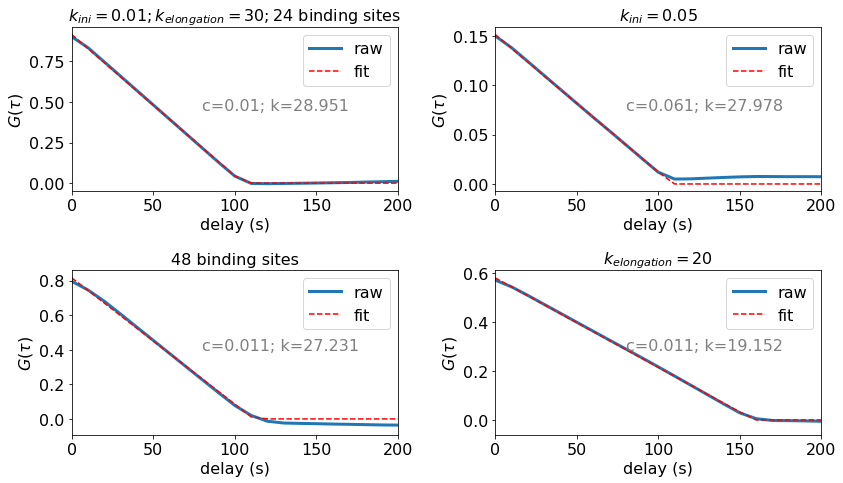

In [83]:
plt.rcParams["figure.figsize"] = (12,7)
subplot(2,2,1)
xdata = np.arange(0,600,10)
ydata = autocorr1

plt.title(r'$k_{ini}=0.01; k_{elongation}=30;$24 binding sites')
plt.plot(xdata, autocorr1, label='raw',**plotStyles);
popt, pcov = curve_fit(my_func2, xdata, autocorr1, p0=[0.05,100],maxfev=10000,bounds=(0, [1,200]))
plt.plot(xdata, my_func2(xdata,*popt),'r--',label='fit')
plt.text(80,0.5*max(autocorr1), 'c='+str(round(popt[0],3))+'; k='+str(round(40*76/popt[1],3)),color='gray')
plt.ylabel(r'$G(\tau)$'); plt.xlabel('delay (s)'); 
plt.xlim(0,200)
plt.legend()

subplot(2,2,2)
xdata = np.arange(0,600,10)
ydata = autocorr1

plt.title(r'$k_{ini}=0.05$')
plt.plot(xdata, autocorr2, label='raw',**plotStyles);
popt, pcov = curve_fit(my_func2, xdata, autocorr2, p0=[0.01,100],maxfev=10000,bounds=(0, [1,200]))
plt.plot(xdata, my_func2(xdata,*popt),'r--',label='fit')
plt.text(80,0.5*max(autocorr2), 'c='+str(round(popt[0],3))+'; k='+str(round(40*76/popt[1],3)),color='gray')
plt.ylabel(r'$G(\tau)$'); plt.xlabel('delay (s)'); 
plt.xlim(0,200)
plt.legend()

subplot(2,2,3)
xdata = np.arange(0,600,10)
ydata2 = autocorr3

plt.title(r'48 binding sites')
plt.plot(xdata, ydata2, label='raw',**plotStyles);
popt, pcov = curve_fit(my_func2, xdata, ydata2, p0=[0.05,100],maxfev=10000,bounds=(0, [1,200]))
plt.plot(xdata, my_func2(xdata,*popt),'r--',label='fit')
plt.text(80,0.5*max(ydata2), 'c='+str(round(popt[0],3))+'; k='+str(round(40*76/popt[1],3)),color='gray')
plt.ylabel(r'$G(\tau)$'); plt.xlabel('delay (s)'); 
plt.xlim(0,200)
plt.legend()

subplot(2,2,4)
xdata = np.arange(0,600,10)
ydata2 = autocorr4

plt.title(r'$k_{elongation}=20$')
plt.plot(xdata, ydata2, label='raw',**plotStyles);
popt, pcov = curve_fit(my_func2, xdata, ydata2, p0=[0.05,100],maxfev=10000,bounds=(0, [1,200]))
plt.plot(xdata, my_func2(xdata,*popt),'r--',label='fit')
plt.text(80,0.5*max(ydata2), 'c='+str(round(popt[0],3))+'; k='+str(round(40*76/popt[1],3)),color='gray')
plt.ylabel(r'$G(\tau)$'); plt.xlabel('delay (s)'); 
plt.xlim(0,200)
plt.legend()


plt.tight_layout()